In [ ]:
# @title Student Submission Details
# @markdown Please run this cell and enter your details. Name and Email are required.
# @markdown **LinkedIn post and video URLs are optional.**

# --- Get Student Information ---

# Name (Text field)
student_name = "Sarah AbuMandil" #@param {type:"string"}
if not student_name:
  print("⚠️ Please enter your name.")

# Email (Text field)
student_email = "sabumandil@gmail.com" #@param {type:"string"}
if not student_email:
  print("⚠️ Please enter your email.")

# LinkedIn Post URL (optional)
linkedin_post_url = "optional" #@param {type:"string"}

# Video URL (optional)
video_url = "optional" #@param {type:"string"}


# --- Display Confirmation ---
if student_name and student_email:
  print("\n" + "="*40)
  print("   SUBMISSION DETAILS CONFIRMATION")
  print("="*40)
  print(f"👤 Name: {student_name}")
  print(f"📧 Email: {student_email}")

  if linkedin_post_url and linkedin_post_url != "optional":
      print(f"🔗 LinkedIn Post: {linkedin_post_url}")
  else:
      print("☑️ LinkedIn Post: Not provided")

  if video_url and video_url != "optional":
      print(f"📹 Video URL: {video_url}")
  else:
      print("☑️ Video URL: Not provided")

  print("="*40)
  print("✅ Details recorded. You can proceed to the next step.")


   SUBMISSION DETAILS CONFIRMATION
👤 Name: Sarah AbuMandil
📧 Email: sabumandil@gmail.com
☑️ LinkedIn Post: Not provided
☑️ Video URL: Not provided
✅ Details recorded. You can proceed to the next step.


# 🚀 AraBERT Question Answering Project

## Project Overview
Welcome to this project on Question Answering with AraBERT! The goal is to fine-tune the AraBERT model on the Arabic SQuAD dataset to build a system that can answer questions based on a given context. You will also create a web application to serve your model to the world.

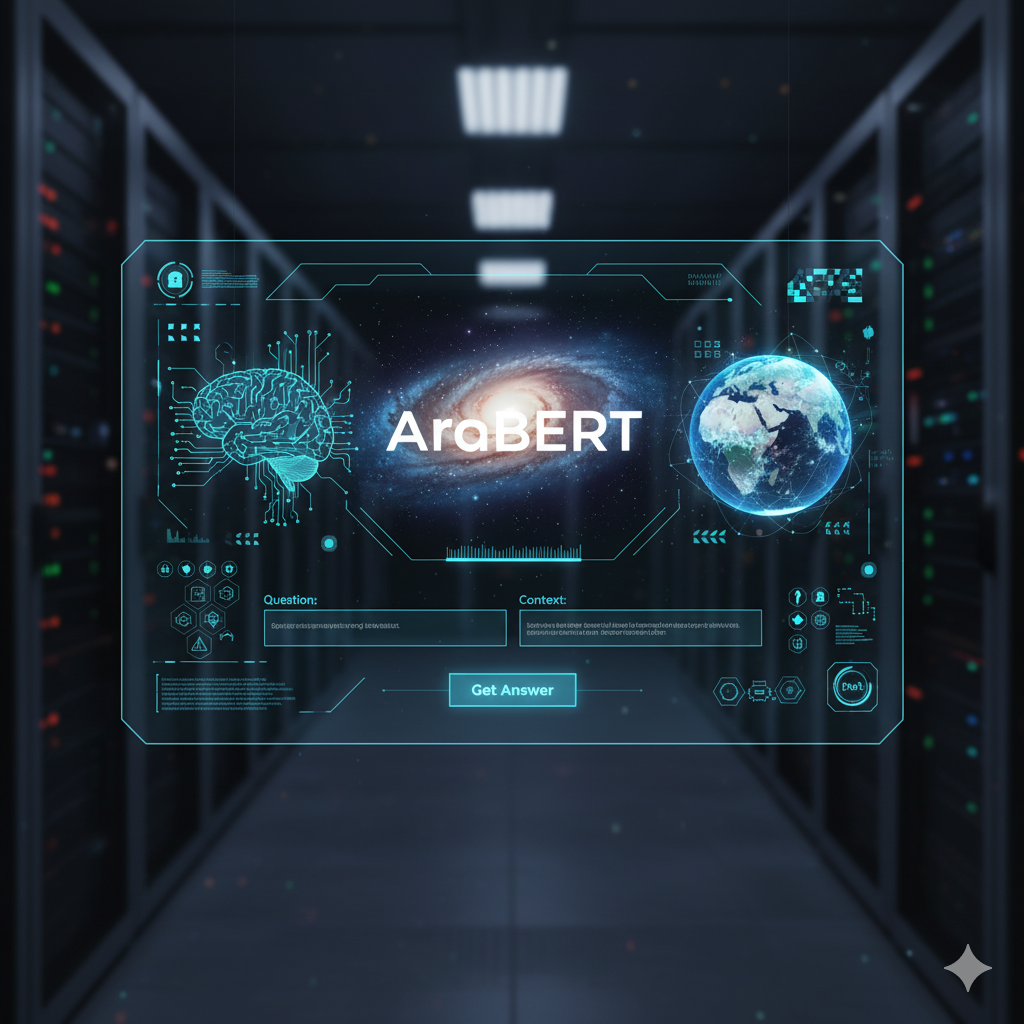



This project will challenge you to:
* Prepare and preprocess a dataset using the `datasets` library.
* Fine-tune a transformer model using PyTorch.
* Build an interactive web application using `Streamlit`.
* Deploy the app temporarily using `ngrok`.

## 🌍 Getting Started
1.  **Open the provided Colab Template:** This notebook comes with all the necessary libraries installed and the dataset downloaded.
2.  **Familiarize yourself with the notebook:** Take a look at the pre-written code cells to understand how the environment is set up and how the data is loaded.

## 🎥 Videos
Please watch the following videos to get a better understanding of the concepts used in this project.

In [ ]:
#@title Fine Tuning LLM Explained Simply

from IPython.display import HTML


# Create the HTML for embedding
html_code = f"""

<iframe width="560" height="315" src="https://www.youtube.com/embed/ezdIOLbUSWg?si=hR-dSB9ccgwHmtoV" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

"""
# Display the video
display(HTML(html_code))

In [ ]:
#@title Applying BERT to Question Answering (SQuAD v1.1)


from IPython.display import HTML


# Create the HTML for embedding
html_code = f"""

<iframe width="560" height="315" src="https://www.youtube.com/embed/l8ZYCvgGu0o?si=Z7EDmy9qHaO0L0nt" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

"""
# Display the video
display(HTML(html_code))

## 🔧 Project Workflow & Exercises

### Step 1: Import Dependencies
The necessary libraries are already installed in this environment. We just need to import them.

In [3]:
!pip install arabert streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 134.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 149.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 14.5 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186456 sha256=580e774db76fa358c748c95dfb4f78e0005f4b3287e10bbb2e5d310f509bc896
  Stored in directory: /root/.cache/pip/wheels/bb/f1/26/f9002669ef6ad80a3c9f1b22880b35d9b4c6650011acee0523
Successfully built emoji


In [4]:
# Import libraries
import torch
from arabert.preprocess import ArabertPreprocessor
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, Trainer, TrainingArguments
import streamlit as st
from pyngrok import ngrok
import subprocess
import os

### Step 2: Load and Prepare the Data
The Arabic SQuAD dataset is already downloaded. Now, we'll load and preprocess it for our model.

**Exercise 1: Load the Arabic SQuAD dataset**

Use the `load_dataset` function to load the `arcd` dataset, which is an Arabic SQuAD-like dataset.

In [5]:
from datasets import load_dataset
# Load the Arabic SQuAD dataset
dataset = load_dataset('arcd')
print("Dataset structure:", dataset)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/174k [00:00<?, ?B/s]

plain_text/validation-00000-of-00001.par(…):   0%|          | 0.00/192k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/693 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/702 [00:00<?, ? examples/s]

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 693
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 702
    })
})


**Exercise 2: Preprocess the data**

Create a function to preprocess the data. This function should tokenize the questions and contexts and format them in a way that the model can understand.

### Step 3: Fine-tune AraBERT
Now we will fine-tune the AraBERT model on our preprocessed dataset.

In [6]:
from transformers import AutoTokenizer

# Initialize tokenizer
model_name = "aubmindlab/bert-base-arabertv2"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Set preprocessing parameters
max_length = 384
doc_stride = 128

def preprocess_function(examples):
    """
    Oxford-style preprocessing function for question-answering tasks.
    Converts raw text into model-understandable format with proper label alignment.
    """
    # Clean questions
    questions = [q.strip() for q in examples["question"]]

    # Tokenize inputs
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=doc_stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length"
    )

    # Extract necessary components
    offset_mapping = inputs.pop("offset_mapping")
    sample_mapping = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]

    # Initialize position trackers
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        sample_idx = sample_mapping[i]
        answer = answers[sample_idx]
        start_char = answer["answer_start"][0]
        end_char = start_char + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Identify context boundaries
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while idx < len(sequence_ids) and sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # Handle answers outside context
        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Locate start token position
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            # Locate end token position
            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    # Add positions to inputs
    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

# Apply preprocessing
tokenized_datasets = dataset.map(
    preprocess_function,
    batched=True,
    remove_columns=dataset["train"].column_names
)
print("Preprocessed datasets:", tokenized_datasets)

tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/693 [00:00<?, ? examples/s]

Map:   0%|          | 0/702 [00:00<?, ? examples/s]

Preprocessed datasets: DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 726
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'start_positions', 'end_positions'],
        num_rows: 732
    })
})


**Exercise 3: Define the training arguments and trainer**

Define the training arguments for the `Trainer` class. Then, create an instance of the `Trainer` class.



In [7]:
#@title Ignore warnings

import warnings
from transformers.utils import logging

# Suppress the specific FutureWarning about the 'tokenizer' argument
warnings.filterwarnings("ignore", message="`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`.*")

# Suppress the UserWarning about 'pin_memory' when no GPU is found
warnings.filterwarnings("ignore", message=".*'pin_memory' argument is set as true but no accelerator is found.*")

# Set transformers logging level to 'error' to hide the info messages
# This will hide the "Some weights..." and "tokenizer has new PAD..." messages
logging.set_verbosity_error()

In [ ]:
!pip uninstall -y transformers
!pip install transformers==4.44.2

Found existing installation: transformers 4.57.1
Uninstalling transformers-4.57.1:
  Successfully uninstalled transformers-4.57.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1


In [ ]:
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer

model = AutoModelForQuestionAnswering.from_pretrained(model_name)
output_dir = "./arabert_qa_results"

# **FIXED TRAINING ARGUMENTS**
training_args = TrainingArguments(
    output_dir=output_dir,
    eval_strategy="epoch",  # CORRECT PARAMETER NAME
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=True,
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer
)

print("Starting training...")
trainer.train()

print("Saving model...")
trainer.save_model()
tokenizer.save_pretrained(output_dir)

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Starting training...
{'eval_loss': 4.180171966552734, 'eval_runtime': 3.949, 'eval_samples_per_second': 185.363, 'eval_steps_per_second': 23.297, 'epoch': 1.0}
{'eval_loss': 3.8071422576904297, 'eval_runtime': 3.9638, 'eval_samples_per_second': 184.672, 'eval_steps_per_second': 23.21, 'epoch': 2.0}
{'eval_loss': 3.692612886428833, 'eval_runtime': 4.2018, 'eval_samples_per_second': 174.21, 'eval_steps_per_second': 21.895, 'epoch': 3.0}
{'train_runtime': 109.0416, 'train_samples_per_second': 19.974, 'train_steps_per_second': 2.504, 'train_loss': 3.999357454069368, 'epoch': 3.0}
Saving model...


('./arabert_qa_results/tokenizer_config.json',
 './arabert_qa_results/special_tokens_map.json',
 './arabert_qa_results/vocab.txt',
 './arabert_qa_results/added_tokens.json',
 './arabert_qa_results/tokenizer.json')

In [ ]:
#@title 🧪 Student Playground
#@markdown Run this cell and enter your own context and question to test the model.
#@markdown ---

# --- ↓↓↓ FILL IN YOUR TEXT HERE ↓↓↓ ---
my_context = "تُعدّ أهرامات الجيزة في مصر من أشهر المعالم الأثرية في العالم. الهرم الأكبر، وهو هرم خوفو، هو أحد عجائب الدنيا السبع القديمة. تم بناء هذا الهرم كمقبرة للفرعون المصري خوفو." #@param {type:"string"}
my_question = "لمن تم بناء الهرم الأكبر؟" #@param {type:"string"}
# --- ↑↑↑ FILL IN YOUR TEXT HERE ↑↑↑ ---

# We'll run the model only if you've filled in both fields.
if my_context.strip() and my_question.strip():
    print("🤖 Finding the answer...")

    # Run the pipeline with your text
    result = qa_pipeline(question=my_question, context=my_context)

    print("\n" + "="*30)
    print(f"✅ Answer: {result['answer']}")
    print(f"📊 Score: {result['score']:.4f}")
    print("="*30)
else:
    print("🚫 Please fill in both the `my_context` and `my_question` fields, then run this cell again.")

🤖 Finding the answer...

✅ Answer: بناء هذا الهرم كمقبرة للفرعون المصري خوفو.
📊 Score: 0.0148


### Step 4: Write Your Report
Write a report explaining your method and the performance of your model. The report should include:
* A brief introduction to the problem of Question Answering.
* A description of the AraBERT model and the Arabic SQuAD (`arcd`) dataset.
* A detailed explanation of your data preprocessing and fine-tuning process.
* The results of your model's performance on the test set (e.g., final evaluation loss).
* A conclusion summarizing your findings and potential future improvements.



-------
-------
--------------
-------
--------------
-------
--------------
-------
--------------
-------
-------
*(You can write your report here in this markdown cell)*
-------
-------
--------------
-------
--------------
-------
--------------
-------
--------------
-------
-------


### Step 5: Build and Serve the Streamlit App
Now, we'll build a Streamlit app to interact with our fine-tuned model and serve it using `ngrok`.

**Exercise 4: Complete the app.py file**

Fill in the missing parts of the `app.py` file below to create the Streamlit app.

In [ ]:
%%writefile app.py

# TODO: Import streamlit as st
import ...
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, pipeline
import torch

# --- Page Configuration ---
# TODO: Set the page config with a title and icon
st.set_page_config(
    page_title="...",
    page_icon="🤖",
    layout="wide"
)

# --- Model Loading ---
# TODO: Add the streamlit decorator to cache the model loading
@...
def load_model():
    # Path to your fine-tuned model
    model_path = "./arabert_qa_results"
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_path)
        model = AutoModelForQuestionAnswering.from_pretrained(model_path)
        # Use GPU if available
        device = 0 if torch.cuda.is_available() else -1

        # TODO: Create a question-answering pipeline
        return pipeline(...)

    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None

# TODO: Call the load_model function to get the pipeline
qa_pipeline = ...

# --- App Title and Description ---
# TODO: Create a title for your app
st.title("...")
st.markdown("هذا التطبيق يستخدم نموذج AraBERT مُحسَّن للإجابة على الأسئلة بناءً على سياق مُعطى")

# --- User Input ---
st.header("Ask a Question | اطرح سؤالاً")

# TODO: Create a text_area for the context
context = st.text_area("...", height=200)

# TODO: Create a text_input for the question
question = st.text_input("...")

# --- Prediction ---
# TODO: Create a button to submit the question
if st.button("Get Answer | احصل على الإجابة"):

    # Check if all inputs are provided
    if qa_pipeline and context and question:

        # TODO: Use st.spinner to show a loading message
        with st.spinner("Finding the answer... | ...جاري البحث عن الإجابة"):
            try:
                # TODO: Call the qa_pipeline with the question and context
                result = qa_pipeline(...)

                # TODO: Display the answer using st.success
                st.success(f"**Answer (الإجابة):** {result['answer']}")

                # TODO: Display the score using st.info
                st.info(f"**Score (نسبة الثقة):** {result['score']:.4f}")

            except Exception as e:
                st.error(f"An error occurred during prediction: {e}")

    elif not qa_pipeline:
        st.error("Model could not be loaded. Please check the logs.")
    else:
        # TODO: Add a warning if context or question is missing
        st.warning("...")

Overwriting app.py


### Step 6: Set up ngrok and Run the App
Finally, we'll expose our app to the internet using `ngrok`.

You will need an `ngrok` authtoken for this step.
1.  Go to the ngrok Dashboard and sign up for a free account.
2.  Find your authtoken on the Your Authtoken page.
3.  Paste your authtoken into the input field in the code below.

In [2]:
#@title Set Your ngrok Authtoken and Run App
#@markdown <br>
#@markdown ---
#@markdown **Enter your ngrok authtoken here:**
authtoken = "33Pj3Lf38NCYNLFBu0GWxYxgvX0_6hjoE6wLzYcNtRT69fLeV" #@param {type:"string"}

if authtoken:
    # Kill any existing ngrok or streamlit processes
    !killall ngrok
    !pkill -f "streamlit run app.py"

    # Set auth token
    ngrok.set_auth_token(authtoken)

    # Run the streamlit app as a background process
    print("Starting Streamlit app in the background...")
    # Using os.devnull to hide subprocess output from cluttering the cell
    process = subprocess.Popen(
        ["streamlit", "run", "app.py", "--server.port", "8501"],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        preexec_fn=os.setsid
    )

    # Open a tunnel to the Streamlit port
    try:
        public_url = ngrok.connect(addr='8501', proto='http')
        print(f"🚀 Streamlit App URL: {public_url}")
        print("Note: The app is running in the background.")
        print("To stop the app, you will need to interrupt or restart the Colab runtime.")
    except Exception as e:
        print(f"Error connecting ngrok: {e}")
        print("Please check your authtoken and ensure ngrok is not already running.")
else:
    print("Please enter your ngrok authtoken in the field above to run the app.")
    print("Get your token from https://dashboard.ngrok.com/get-started/your-authtoken")

ngrok: no process found


NameError: name 'ngrok' is not defined

## 🚀 Optional Tasks
* **LinkedIn Post:** Write a LinkedIn post about your project, explaining what you did and what you learned.
* **Video Creation:** Create a short video of your work and upload it to LinkedIn or YouTube.
* **Add More Functionality:**
    * Allow users to choose from different pre-loaded contexts.
    * Add a "Clear" button to reset the input fields.
    * Deploy the app permanently using [Streamlit Community Cloud](https://streamlit.io/cloud).

## 📝 Submission
Please submit the following:
1.  A link to your completed Colab notebook (shareable link).
2.  Your written report (can be in a markdown cell in this notebook).
3.  (Optional) A link to your LinkedIn post or video.

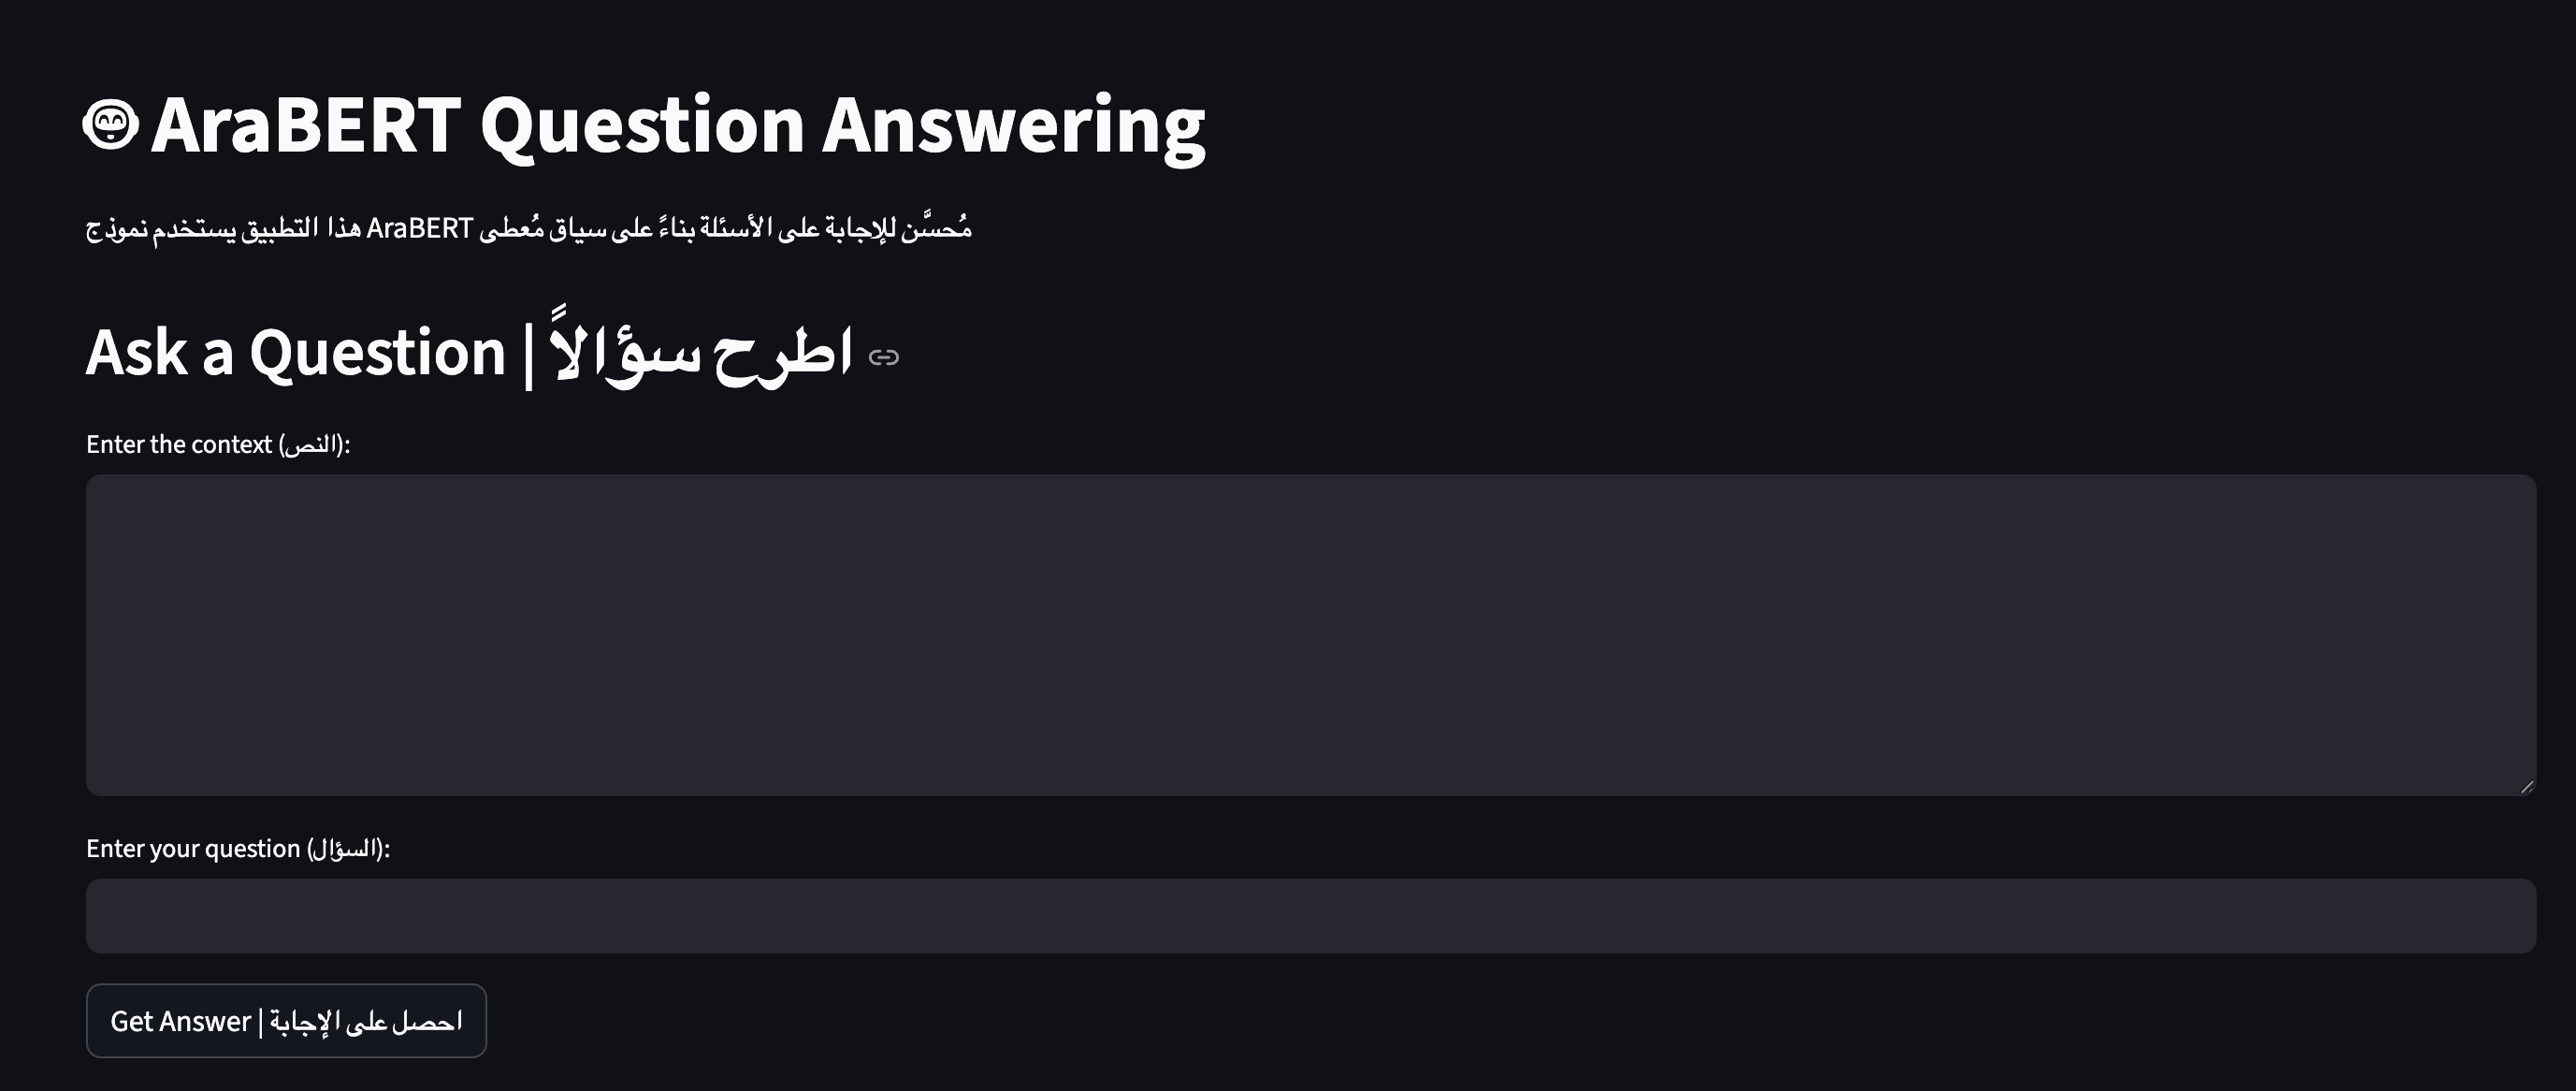

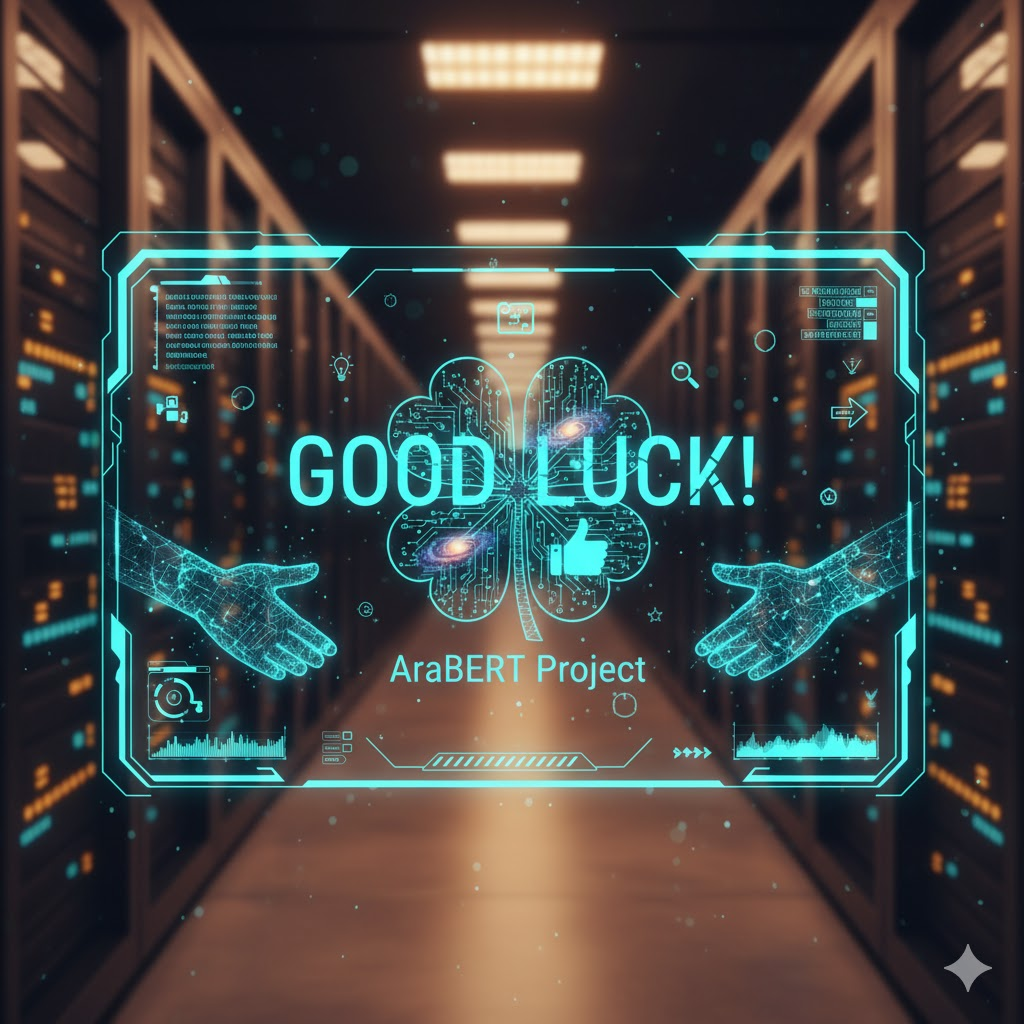